In [2]:
from qwak.qwak import QWAK
import networkx as nx
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from math import sqrt, ceil, pow
import scipy.special as sp
from scipy.linalg import expm
import sympy as simp

# One element Grover search

In [3]:
n=8
t = (np.pi/2) * np.sqrt(n)
# t=0
gamma = 1/n
initCond = list(range(0,n))
# print(initCond)
graph = nx.complete_graph(n)

qw = QWAK(graph=graph,markedSearch=[(n//2,-1)],laplacian=True)
qw.runWalk(time=t,gamma=gamma,initStateList=initCond)
print(qw.getAdjacencyMatrix())

[[ 7.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j]
 [-1.+0.j  7.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j]
 [-1.+0.j -1.+0.j  7.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j]
 [-1.+0.j -1.+0.j -1.+0.j  7.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j]
 [-1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j]
 [-1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j  7.+0.j -1.+0.j -1.+0.j]
 [-1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j  7.+0.j -1.+0.j]
 [-1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j  7.+0.j]]


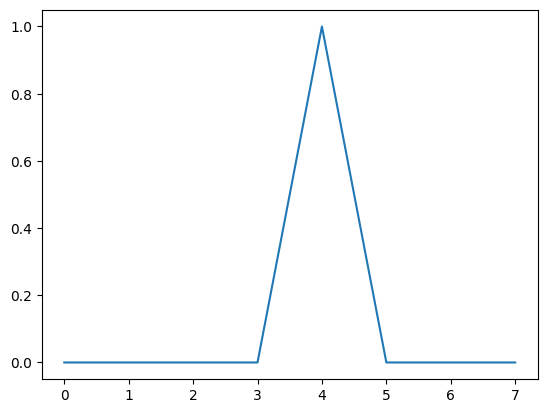

In [4]:
plt.plot(qw.getProbVec())

# Multiple element Grover Search

# Single Shot Grover

In [54]:
k = 6
n=2**(k)
# t = (np.pi/2) * np.sqrt(n)
t=0.2
gamma = 1/n
initCond = list(range(0,n))
# print(initCond)
graph = nx.complete_graph(n)
markedSearch = [(x,-1) for x in range(0,n//4)]

qw = QWAK(graph=graph,markedSearch=markedSearch,laplacian=True)
qw.runWalk(time=t,gamma=gamma,initStateList=initCond)
print(qw.getAdjacencyMatrix())

[[-1.+0.j -1.+0.j -1.+0.j ... -1.+0.j -1.+0.j -1.+0.j]
 [-1.+0.j -1.+0.j -1.+0.j ... -1.+0.j -1.+0.j -1.+0.j]
 [-1.+0.j -1.+0.j -1.+0.j ... -1.+0.j -1.+0.j -1.+0.j]
 ...
 [-1.+0.j -1.+0.j -1.+0.j ... 63.+0.j -1.+0.j -1.+0.j]
 [-1.+0.j -1.+0.j -1.+0.j ... -1.+0.j 63.+0.j -1.+0.j]
 [-1.+0.j -1.+0.j -1.+0.j ... -1.+0.j -1.+0.j 63.+0.j]]


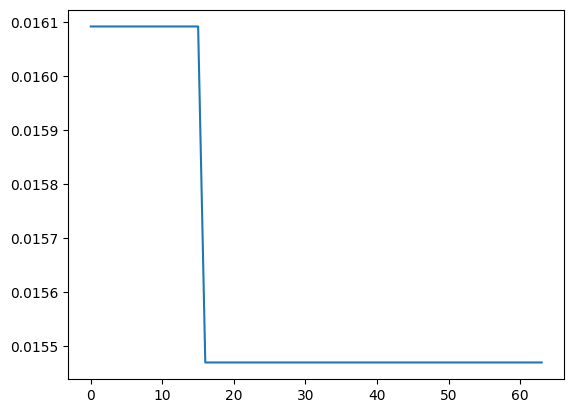

In [55]:
plt.plot(qw.getProbVec())

# Multiple single element searches

In [87]:
numberOfWalks = 4
minWalkSize = 3
nList = [2**x for x in range(minWalkSize,numberOfWalks+minWalkSize)]

tList = [(np.pi/2) * np.sqrt(x) for x in nList]

gammaList = [1/x for x in nList]

markedSearchList =[[(x//2,-1)] for x in nList]


qwakList = []

for (t,markedSearch,n,gamma) in zip(tList,markedSearchList,nList,gammaList):
    graph = nx.complete_graph(n)
    qw = QWAK(graph=graph,markedSearch=markedSearch,laplacian=True)
    initCond = list(range(0,n))
    qw.runWalk(time=t,gamma=gamma,initStateList=initCond)
    print(f"qwakSize:{qw.getDim()}\t qwakTime:{qw.getTime()}")
    qwakList.append(qw.getProbVec())


qwakSize:8	 qwakTime:4.442882938158366
qwakSize:16	 qwakTime:6.283185307179586
qwakSize:32	 qwakTime:8.885765876316732
qwakSize:64	 qwakTime:12.566370614359172


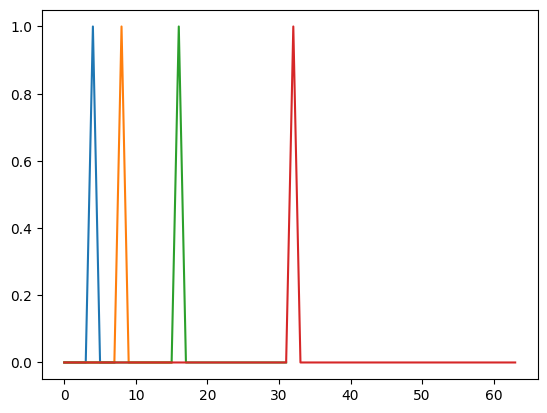

In [89]:
for qwak in qwakList:
    plt.plot(qwak)